<a href="https://colab.research.google.com/github/CarlosJiZe/Prueba/blob/main/Copia_de_Notebook_Proyecto_final_(Data_Science_F3%2C_M1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# _**BEDU** | DATA SCIENCE_
## _**MÓDULO 1** (FASE 3) | ANÁLISIS DE DATOS CON PYTHON_
#### _**PROYECTO FINAL** | Colab NOTEBOOK (EQUIPO 3)_

> _**ANTES DE COMENZAR...**_
>
> _¿Qué te parece si nos ubicamos dentro del mismo contexto?_

Desde el módulo pasado el Equipo 3 seleccionó una problemática social de interés común, a partir de la cual se redactó un escrito guía que facilitó el inicio del presente análisis de datos.

Si tienes curiosidad por conocer el escrito antes mencionado, puedes visitar este [enlace](https://docs.google.com/document/d/1wwfUJ4ZAmH6cBWL_miKNlR_3_5xI5iKGUcqG-Ijl-J4/edit) y darle un vistazo. Sin embargo, para lograr contextualizarnos, bastará con mencionar el objetivo general que perseguimos con este trabajo. Es decir: `Determinar la postura ideológica predominante entre la población mexicana hacia el fenómeno de vacunación COVID19, evaluando distintos aspectos de aceptación, así como posibles rasgos sociológicos y conductuales que estén implicados en el tema`.

Cabe mencionar también que los conjuntos de datos utilizados a continuación fueron procesados previamente, organizados y situados en archivos `.csv`; de modo entonces que el presente _Notebook_ da inicio con una lectura de dichos archivos.

Finalmente, si tienes curiosidad por conocer el origen de nuestros datos y el procedimiento que seguimos para procesarlos, puedes visitar el siguiente [enlace](https://colab.research.google.com/drive/1irL6j0hV3PCo--oHpsDgedOZjckVLVX0#scrollTo=6avDa8Wuzm3i) y darle un vistazo al _Notebook_ que creamos desde el módulo anterior.

> _**ADEMÁS...**_
>
> _En este punto del desarrollo, afortunadamente ya se tiene una perspectiva mucho más clara de la problemática. Por lo tanto, se identificaron ya, de manera precisa, cuáles son los datos que nos servirán para responder adecuadamente nuestras preguntas y cuáles no._
>
> _De modo que sí o sí es necesario aplicar nuevamente un pequeño procesamiento, con la intención de optimizar el análisis de nuestros datos y reducir el tamaño de nuestros datsets_.

In [2]:
import pandas as pd # Se importa la primera librería que vamos a utilizar.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> _**LO QUE SIGUE ES ¡MUY IMPORTANTE! PARA QUE PUEDAS LEER LOS DATASETS DESDE TU COLAB...**_
>
> _Si no modificas la ruta de acceso que está escrita en la línea de código siguiente, no podrás ejecutar exitosamente el Notebook. Por lo tanto, sigue los pasos que a continuación se enlistan._
>
> 1. _Agrega un acceso directo de este [directorio](https://drive.google.com/drive/folders/1TxFNyAPz5nSFdKK_fPat5iyzZwzr07er?usp=sharing) a tu `Google Drive`._
2. _Vincula tu `Drive` con `Colab`._
3. _Desde `Colab`, busca la carpeta que recién agregaste y copia su ruta de acceso._
4. _Con la ruta que copiaste, sustituye la asignación que tiene escrita la variable `ruta_de_acceso`._
5. _Procede con la ejecución del Notebook._

In [4]:
ruta_de_acceso = "/content/drive/MyDrive/Datasets Equipo 3"

In [5]:
df1 = pd.read_csv(ruta_de_acceso + "/Dataset_1.csv", index_col = 0, header = [0, 1], engine='python')
df1.rename(columns = {"Unnamed: 3_level_0": ""}, inplace = True) # 'Dataset' 1.

df2 = pd.read_csv(ruta_de_acceso + "/Dataset_2.csv", index_col = 0, header = [0, 1], engine='python')
df2.rename(columns = {"Unnamed: 3_level_0": ""}, inplace = True) # 'Dataset' 2.

df3 = pd.read_csv(ruta_de_acceso + "/Dataset_3.csv", index_col = 0, header = [0, 1], engine='python')
df3.rename(columns = {"Unnamed: 3_level_0": ""}, inplace = True) # 'Dataset' 3.

# Nota que aunque la carpeta que agregaste a tu 'Drive' como acceso directo tenga cuatro 'datasets', las variables almacenadas en el último
# conjunto de datos no son suficientemente significativas para responder nuestras preguntas y por tanto se omitirán desde ahora.

In [6]:
df1_dropped = df1.drop(columns = [("know_people_sick", "indicator_percentage"),
                                  ("know_people_sick", "sample_size"),
                                  ("food_lackness_concern", "indicator_percentage"),
                                  ("food_lackness_concern", "sample_size")]) # Se eliminan las columnas del primer 'dataset' que se consideraron poco
                                                                             # útiles para responder nuestras preguntas.
df2_dropped = df2.drop(columns = [("trust_politicians_recommendation", "indicator_percentage"),
                                  ("trust_politicians_recommendation", "sample_size")]) # Se eliminan las columnas del segundo 'dataset' que se consideraron
                                                                                        # poco útiles para responder nuestras preguntas.

# Nota que el tercer conjunto de datos quedó intacto, pues eventualmente todas sus columnas nos aportarán información para responder preguntas.

> _**AHORA SÍ, SIN MÁS POR EL MOMENTO...**_
>
> _¿Qué te parece si comenzamos?_

In [7]:
!pip install plotly --upgrade; # Esta línea de código se utiliza para actualizar la librería 'plotly', la cual se utilizará más adelante.

     |████████████████████████████████| 23.9 MB 13 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [8]:
# Se declara el resto de paquetes y librerías que se utilizarán a lo largo de este 'Notebook'.
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import skew, kurtosis

#### _**Sesión 1:** Estimados de locación y variabilidad_

**Tomando los siguientes indicadores: `accept_vaccine (df2)`, `financial_concern (df1)` y `barrier_side_effects (df3)` obtén las siguientes medidas de estadística para cada uno de ellos: 'mean', 'weighted mean', 'trimmed mean', 'median', 'std', 'range', 'percetile 0.25', 'percentile 0.75' y 'IQR'. Almacena los resultados en un _dataframe_ con índices apropiados, tanto para filas como para columnas**.

> **¡Debes notar que...!**
>
> se calculó la **media ponderada** de los indicadores `accept_vaccine`, `financial_concern` y `barrier_side_effects`, porque el tamaño o "peso" de las muestras con las cuales se obtuvieron sus respectivos porcentajes variaba diariamente.
>
> No obstante, por comodidad y para facilitarnos el manejo de los datos, en todos los procedimientos posteriores se utilizará la media aritmética simple. Nótese que únicamente se pretende demostrar lo aprendido durante el curso y aplicar las herramientas computacionales que este nos brindó. Por lo tanto, resulta indistinto qué medida de estadística se utilice.

Por otro lado, a continuación se enuncia brevemente el significado de los indicadores antes utilizados:

`accept_vaccine`: indica cuál es el porcentaje de la población que acepta la vacuna.

`financial_concern`: indica cuál es el porcentaje de la población que se preocupa por su estado financiero (hasta cierto punto es un indicador del estatus socioeconómico de quienes contestaron la encuesta).

`barrier_side_effects`: inidica cuál es el porcentaje de la población que considera que los efectos secundarios de la vacuna son un impedimento para aplicársela.

##### **Financial_concern**

###### **Limpieza del df1**

In [9]:
df1_dropped.head(2) ## Revisamos la nueva configuración del df1

survey_information              ...    financial_concern            
  region_where_applied survey_date  ... indicator_percentage sample_size
0       Aguascalientes  2020-11-23  ...             0.630136        6991
1       Aguascalientes  2020-11-24  ...             0.619214        7853

[2 rows x 9 columns]

In [10]:
df1_columnas_sin_indexar=df1_dropped.copy() 
df1_columnas_sin_indexar.columns=df1_columnas_sin_indexar.columns.droplevel(0)
df1_columnas_sin_indexar.head(2) #Aqui lo que se hace es crear un nuevo df pero sin multi-indice

# Tener cuidado de solo ejecutar esta celda una vez, ya que intentar hacerlo de nuevo va a dar un error ya que el multi-indice ya fue eliminado

,region_where_applied,survey_date,survey_date_short,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size
0,Aguascalientes,2020-11-23,2020-11,0.023153,8453,0.899553,7455,0.630136,6991
1,Aguascalientes,2020-11-24,2020-11,0.020100,9490,0.901764,8354,0.619214,7853


In [11]:
df_1_financial_corcern=df1_columnas_sin_indexar.iloc[:,[0,2,7,8]]
df_1_financial_corcern.head(2) ## Separamos las columnas que solo corresponden a financial_concern

,region_where_applied,survey_date_short,indicator_percentage,sample_size
0,Aguascalientes,2020-11,0.630136,6991
1,Aguascalientes,2020-11,0.619214,7853


In [12]:
amount_of_positive_answers=df_1_financial_corcern.sample_size*df_1_financial_corcern.indicator_percentage 
df_1_financial_corcern.insert(4,'amount_of_positive_answers',amount_of_positive_answers)
df_1_financial_corcern.head(2) #Insertamos una tercero columna para poder hacer todo el analisis sobre la misma

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-11,0.630136,6991,4405.280776
1,Aguascalientes,2020-11,0.619214,7853,4862.687542


###### **Media**

In [13]:
media=df_1_financial_corcern['amount_of_positive_answers'].mean() #Media
print(f'El promedio de personas que se preocuparon por la situación financiera en México por día es de:{round(media,0)}')

El promedio de personas que se preocuparon por la situación financiera en México por día es de:3365.0


###### **Media ponderada**

In [14]:
Total_personas_entrevistadas=df_1_financial_corcern['sample_size'].sum()
weight_of_sample=(df_1_financial_corcern['sample_size']*100)/Total_personas_entrevistadas
df_1_financial_corcern_02=df_1_financial_corcern.copy() #Creamos un nuevo df para el calculo de la media ponderada
df_1_financial_corcern_02.insert(4,'weight_of_sample',weight_of_sample)
df_1_financial_corcern_02.head(2) #Aplicamos una regla de tres simple para obtener el peso de la muestra en relación del total de muestras

,region_where_applied,survey_date_short,indicator_percentage,sample_size,weight_of_sample,amount_of_positive_answers
0,Aguascalientes,2020-11,0.630136,6991,0.017632,4405.280776
1,Aguascalientes,2020-11,0.619214,7853,0.019806,4862.687542


In [15]:
# La formula de media ponderada es sumatorio(w_i*x_i)/sumatorio(w_i)
# En nuestro caso w_i es el weight_of_sample y x_i es amount_of_positive_answer
sum_w_i=(df_1_financial_corcern_02['weight_of_sample'].sum())/100 #Se divide entre 100 ya que las cantidades estan en %
w_i_x_i=(df_1_financial_corcern_02['weight_of_sample']/100)*(df_1_financial_corcern_02['amount_of_positive_answers'])
df_1_financial_corcern_02.insert(6,'w_i_x_i',w_i_x_i)
df_1_financial_corcern_02.head(2)

,region_where_applied,survey_date_short,indicator_percentage,sample_size,weight_of_sample,amount_of_positive_answers,w_i_x_i
0,Aguascalientes,2020-11,0.630136,6991,0.017632,4405.280776,0.776718
1,Aguascalientes,2020-11,0.619214,7853,0.019806,4862.687542,0.963080


In [16]:
sum_w_i_x_i=df_1_financial_corcern_02['w_i_x_i'].sum()
media_ponderada=sum_w_i_x_i/sum_w_i

print(f'El promedio ponderado de personas que se preocuparon por la situación financiera en México por día es de:{round(media_ponderada,0)}')

El promedio ponderado de personas que se preocuparon por la situación financiera en México por día es de:4085.0


###### **Media truncada**

In [17]:
media_truncada=stats.trim_mean(df_1_financial_corcern['amount_of_positive_answers'],.10)
print(f'El promedio truncado de personas que se preocuparon por la situación financiera en México por día es de:{round(media_truncada,0)}')

El promedio truncado de personas que se preocuparon por la situación financiera en México por día es de:3301.0


###### **Mediana**

In [18]:
mediana=df_1_financial_corcern['amount_of_positive_answers'].median()
print(f'La mediana de personas que se preocuparon por la situación financiera en México por día es de:{round(mediana,0)}')

La mediana de personas que se preocuparon por la situación financiera en México por día es de:3200.0


###### **Desviación estándar**

In [19]:
std=df_1_financial_corcern['amount_of_positive_answers'].std()
print(f'La desviación estándar de personas que se preocuparon por la situación financiera en México por día es de:{round(std,0)}')

La desviación estándar de personas que se preocuparon por la situación financiera en México por día es de:1629.0


###### **Rango**

In [20]:
rango=df_1_financial_corcern['amount_of_positive_answers'].max()-df_1_financial_corcern['amount_of_positive_answers'].min()
print(f'El rango de personas que se preocuparon por la situación financiera en México por día es de:{round(rango,0)}')

El rango de personas que se preocuparon por la situación financiera en México por día es de:6923.0


###### **Percentile 0.25**

In [21]:
percentil_0_25=df_1_financial_corcern['amount_of_positive_answers'].quantile(0.25)
print(f'El 25% de los días hubo un numero menor o igual a {round(percentil_0_25,0)} de personas que afirman estar preocupada por la situación financiera en todo el país')

El 25% de los días hubo un numero menor o igual a 1878.0 de personas que afirman estar preocupada por la situación financiera en todo el país


###### **Percentile 0.75**

In [22]:
percentil_0_75=df_1_financial_corcern['amount_of_positive_answers'].quantile(0.75)
print(f'El 75% de los días hubo un numero menor o igual a {round(percentil_0_75,0)} de personas que afirman estar preocupada por la situación financiera en todo el país')

El 75% de los días hubo un numero menor o igual a 4684.0 de personas que afirman estar preocupada por la situación financiera en todo el país


###### **IQR**

In [23]:
iqr=df_1_financial_corcern['amount_of_positive_answers'].quantile(0.75)-df_1_financial_corcern['amount_of_positive_answers'].quantile(0.25)
print(f'El 50% de los días hubo un numero menor o igual a {round(percentil_0_75,0)} y mayor o igual a {round(percentil_0_25,0)} de personas que afirman estar preocupada por la situación financiera en todo el país')
print(f'Nuestro IQR es de: {round(iqr,0)}')

El 50% de los días hubo un numero menor o igual a 4684.0 y mayor o igual a 1878.0 de personas que afirman estar preocupada por la situación financiera en todo el país
Nuestro IQR es de: 2806.0


##### **Accept_vaccine**

###### **Limpieza del df2**

In [24]:
df2_dropped.head(2) ## Revisamos la nueva configuración del df2

survey_information              ... trust_government_recommendation            
  region_where_applied survey_date  ...            indicator_percentage sample_size
0       Aguascalientes  2020-12-21  ...                        0.657455        2942
1       Aguascalientes  2020-12-22  ...                        0.644496        7739

[2 rows x 13 columns]

In [25]:
df2_columnas_sin_indexar=df2_dropped.copy() 
df2_columnas_sin_indexar.columns=df2_columnas_sin_indexar.columns.droplevel(0)
df2_columnas_sin_indexar.head(2) #Aqui lo que se hace es crear un nuevo df pero sin multi-indice

,region_where_applied,survey_date,survey_date_short,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size
0,Aguascalientes,2020-12-21,2020-12,0.827023,9244,0.644872,3088,0.721161,3122,0.768438,3152,0.657455,2942
1,Aguascalientes,2020-12-22,2020-12,0.820356,9623,0.653233,8085,0.705194,8229,0.753498,8364,0.644496,7739


In [26]:
df_2_accept_vaccine=df2_columnas_sin_indexar.iloc[:,[0,2,3,4]]
df_2_accept_vaccine.head(2) ## Separamos las columnas que solo corresponden a accept_vaccine

,region_where_applied,survey_date_short,indicator_percentage,sample_size
0,Aguascalientes,2020-12,0.827023,9244
1,Aguascalientes,2020-12,0.820356,9623


In [27]:
amount_of_positive_answers=df_2_accept_vaccine.sample_size*df_2_accept_vaccine.indicator_percentage 
df_2_accept_vaccine.insert(4,'amount_of_positive_answers',amount_of_positive_answers)
df_2_accept_vaccine.head(2) #Insertamos una tercera columna para poder hacer todo el analisis sobre la misma

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-12,0.827023,9244,7645.000612
1,Aguascalientes,2020-12,0.820356,9623,7894.285788


###### **Media**

In [28]:
media_02=df_2_accept_vaccine['amount_of_positive_answers'].mean() #Media
print(f'El promedio de personas que aceptaron la vacuna en México por día es de:{round(media_02,0)}')

El promedio de personas que aceptaron la vacuna en México por día es de:8379.0


###### **Media ponderada**

In [29]:
Total_personas_entrevistadas=df_2_accept_vaccine['sample_size'].sum()
weight_of_sample=(df_2_accept_vaccine['sample_size']*100)/Total_personas_entrevistadas
df_2_accept_vaccine_02=df_2_accept_vaccine.copy() #Creamos un nuevo df para el calculo de la media ponderada
df_2_accept_vaccine_02.insert(4,'weight_of_sample',weight_of_sample)
df_2_accept_vaccine_02.head(2) #Aplicamos una regla de tres simple para obtener el peso de la muestra en relación del total de muestras

,region_where_applied,survey_date_short,indicator_percentage,sample_size,weight_of_sample,amount_of_positive_answers
0,Aguascalientes,2020-12,0.827023,9244,0.060054,7645.000612
1,Aguascalientes,2020-12,0.820356,9623,0.062516,7894.285788


In [30]:
# La formula de media ponderada es sumatorio(w_i*x_i)/sumatorio(w_i)
# En nuestro caso w_i es el weight_of_sample y x_i es amount_of_positive_answer
sum_w_i=(df_2_accept_vaccine_02['weight_of_sample'].sum())/100 #Se divide entre 100 ya que las cantidades estan en %
w_i_x_i=(df_2_accept_vaccine_02['weight_of_sample']/100)*(df_2_accept_vaccine_02['amount_of_positive_answers'])
df_2_accept_vaccine_02.insert(6,'w_i_x_i',w_i_x_i)
df_2_accept_vaccine_02.head(2)

,region_where_applied,survey_date_short,indicator_percentage,sample_size,weight_of_sample,amount_of_positive_answers,w_i_x_i
0,Aguascalientes,2020-12,0.827023,9244,0.060054,7645.000612,4.591145
1,Aguascalientes,2020-12,0.820356,9623,0.062516,7894.285788,4.935224


In [31]:
sum_w_i_x_i=df_2_accept_vaccine_02['w_i_x_i'].sum()
media_ponderada_02=sum_w_i_x_i/sum_w_i

print(f'El promedio ponderado de personas que aceptan la vacuna en México por día es de:{round(media_ponderada_02,0)}')

El promedio ponderado de personas que aceptan la vacuna en México por día es de:8491.0


###### **Media truncada**

In [32]:
media_truncada_02=stats.trim_mean(df_2_accept_vaccine['amount_of_positive_answers'],.10)
print(f'El promedio truncado de personas que aceptaron la vacuna en México por día es de:{round(media_truncada_02,0)}')

El promedio truncado de personas que aceptaron la vacuna en México por día es de:8431.0


###### **Mediana**

In [33]:
mediana_02=df_2_accept_vaccine['amount_of_positive_answers'].median()
print(f'La mediana de personas que aceptaron la vacuna en México por día es de:{round(mediana_02,0)}')

La mediana de personas que aceptaron la vacuna en México por día es de:8741.0


###### **Desviación estándar**

In [34]:
std_02=df_2_accept_vaccine['amount_of_positive_answers'].std()
print(f'La desviación estándar de personas que aceptaron la vacuna en México por día es de:{round(std_02,0)}')

La desviación estándar de personas que aceptaron la vacuna en México por día es de:963.0


###### **Rango**

In [35]:
rango_02=df_2_accept_vaccine['amount_of_positive_answers'].max()-df_2_accept_vaccine['amount_of_positive_answers'].min()
print(f'El rango de personas que aceptaron la vacuna en México por día es de:{round(rango_02,0)}')

El rango de personas que aceptaron la vacuna en México por día es de:4296.0


###### **Percentile 0.25**

In [36]:
percentil_0_25_02=df_2_accept_vaccine['amount_of_positive_answers'].quantile(0.25)
print(f'El 25% de los días hubo un numero menor o igual a {round(percentil_0_25_02,0)} de personas que afirman estar a favor de la vacuna en todo el país')

El 25% de los días hubo un numero menor o igual a 7525.0 de personas que afirman estar a favor de la vacuna en todo el país


###### **Percentile 0.75**

In [37]:
percentil_0_75_02=df_2_accept_vaccine['amount_of_positive_answers'].quantile(0.75)
print(f'El 75% de los días hubo un numero menor o igual a {round(percentil_0_75_02,0)} de personas que afirman estar a favor de la vacuna en todo el país')

El 75% de los días hubo un numero menor o igual a 9120.0 de personas que afirman estar a favor de la vacuna en todo el país


###### **IQR**

In [38]:
iqr_02=df_2_accept_vaccine['amount_of_positive_answers'].quantile(0.75)-df_2_accept_vaccine['amount_of_positive_answers'].quantile(0.25)
print(f'El 50% de los días hubo un numero menor o igual a {round(percentil_0_75_02,0)} y mayor o igual a {round(percentil_0_25_02,0)} de personas que afirman estar a favor de la vacuna en todo el país')
print(f'Nuestro IQR es de: {round(iqr_02,0)}')

El 50% de los días hubo un numero menor o igual a 9120.0 y mayor o igual a 7525.0 de personas que afirman estar a favor de la vacuna en todo el país
Nuestro IQR es de: 1595.0


##### **Barrier_side_effects**

###### **Limpieza del df3**

In [39]:
df3.head(2) ## Revisamos la nueva configuración del df3

survey_information              ... barrier_dont_trust_government            
  region_where_applied survey_date  ...          indicator_percentage sample_size
0       Aguascalientes  2021-02-06  ...                           0.0        2551
1       Aguascalientes  2021-02-07  ...                           0.0        2437

[2 rows x 19 columns]

In [40]:
df3_columnas_sin_indexar=df3.copy() 
df3_columnas_sin_indexar.columns=df3_columnas_sin_indexar.columns.droplevel(0)
df3_columnas_sin_indexar.head(2) #Aqui lo que se hace es crear un nuevo df pero sin multi-indice

,region_where_applied,survey_date,survey_date_short,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size
0,Aguascalientes,2021-02-06,2021-2,0.018895,8164,0.123849,196,0.573751,2551,0.139143,116,0.244192,116,0.050306,2551,0.054113,2551,0.0,2551
1,Aguascalientes,2021-02-07,2021-2,0.022152,8249,0.154368,202,0.570975,2437,0.205662,106,0.132152,106,0.049256,2437,0.067466,2437,0.0,2437


In [41]:
df_3_barrier_side_effects=df3_columnas_sin_indexar.iloc[:,[0,2,7,8]]
df_3_barrier_side_effects.head(2) ## Separamos las columnas que solo corresponden a barrier_side_effects

,region_where_applied,survey_date_short,indicator_percentage,sample_size
0,Aguascalientes,2021-2,0.573751,2551
1,Aguascalientes,2021-2,0.570975,2437


In [42]:
amount_of_positive_answers=df_3_barrier_side_effects.sample_size*df_3_barrier_side_effects.indicator_percentage 
df_3_barrier_side_effects.insert(4,'amount_of_positive_answers',amount_of_positive_answers)
df_3_barrier_side_effects.head(2) #Insertamos una tercera columna para poder hacer todo el analisis sobre la misma

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2021-2,0.573751,2551,1463.638801
1,Aguascalientes,2021-2,0.570975,2437,1391.466075


###### **Media**

In [43]:
media_03=df_3_barrier_side_effects['amount_of_positive_answers'].mean() #Media
print(f'El promedio de personas que no aceptaron la vacuna debido a sus efectos secundarios en México por día es de:{round(media_03,0)}')

El promedio de personas que no aceptaron la vacuna debido a sus efectos secundarios en México por día es de:1115.0


###### **Media ponderada**

In [44]:
Total_personas_entrevistadas=df_3_barrier_side_effects['sample_size'].sum()
weight_of_sample=(df_3_barrier_side_effects['sample_size']*100)/Total_personas_entrevistadas
df_3_barrier_side_effects_02=df_3_barrier_side_effects.copy() #Creamos un nuevo df para el calculo de la media ponderada
df_3_barrier_side_effects_02.insert(4,'weight_of_sample',weight_of_sample)
df_3_barrier_side_effects_02.head(2) #Aplicamos una regla de tres simple para obtener el peso de la muestra en relación del total de muestras

,region_where_applied,survey_date_short,indicator_percentage,sample_size,weight_of_sample,amount_of_positive_answers
0,Aguascalientes,2021-2,0.573751,2551,0.066604,1463.638801
1,Aguascalientes,2021-2,0.570975,2437,0.063628,1391.466075


In [45]:
# La formula de media ponderada es sumatorio(w_i*x_i)/sumatorio(w_i)
# En nuestro caso w_i es el weight_of_sample y x_i es amount_of_positive_answer
sum_w_i=(df_3_barrier_side_effects_02['weight_of_sample'].sum())/100 #Se divide entre 100 ya que las cantidades estan en %
w_i_x_i=(df_3_barrier_side_effects_02['weight_of_sample']/100)*(df_3_barrier_side_effects_02['amount_of_positive_answers'])
df_3_barrier_side_effects_02.insert(6,'w_i_x_i',w_i_x_i)
df_3_barrier_side_effects_02.head(2)

,region_where_applied,survey_date_short,indicator_percentage,sample_size,weight_of_sample,amount_of_positive_answers,w_i_x_i
0,Aguascalientes,2021-2,0.573751,2551,0.066604,1463.638801,0.974847
1,Aguascalientes,2021-2,0.570975,2437,0.063628,1391.466075,0.885361


In [46]:
sum_w_i_x_i=df_3_barrier_side_effects_02['w_i_x_i'].sum()
media_ponderada_03=sum_w_i_x_i/sum_w_i

print(f'El promedio ponderado de personas que no aceptaron la vacuna debido a sus efectos secundarios en México por día es de:{round(media_ponderada_03,0)}')

El promedio ponderado de personas que no aceptaron la vacuna debido a sus efectos secundarios en México por día es de:1181.0


###### **Media truncada**

In [47]:
media_truncada_03=stats.trim_mean(df_3_barrier_side_effects['amount_of_positive_answers'],.10) 
print(f'El promedio truncado de personas que no aceptaron la vacuna debido a sus efectos secundarios en México por día es de:{round(media_truncada_03,0)}')

El promedio truncado de personas que no aceptaron la vacuna debido a sus efectos secundarios en México por día es de:1105.0


###### **Mediana**

In [48]:
mediana_03=df_3_barrier_side_effects['amount_of_positive_answers'].median()
print(f'La mediana de personas que no aceptaron la vacuna debido a sus efectos secundarios en México por día es de:{round(mediana_03,0)}')

La mediana de personas que no aceptaron la vacuna debido a sus efectos secundarios en México por día es de:1083.0


###### **Desviación estándar**

In [49]:
std_03=df_3_barrier_side_effects['amount_of_positive_answers'].std()
print(f'La desviación estándar de personas que no aceptaron la vacuna debido a sus efectos secundarios en México por día es de:{round(std_03,0)}')

La desviación estándar de personas que no aceptaron la vacuna debido a sus efectos secundarios en México por día es de:285.0


###### **Rango**

In [50]:
rango_03=df_3_barrier_side_effects['amount_of_positive_answers'].max()-df_3_barrier_side_effects['amount_of_positive_answers'].min()
print(f'El rango de personas que no aceptaron la vacuna debido a sus efectos secundarios en México por día es de:{round(rango_03,0)}')

El rango de personas que no aceptaron la vacuna debido a sus efectos secundarios en México por día es de:1587.0


###### **Percentile 0.25**

In [51]:
percentil_0_25_03=df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.25)
print(f'El 25% de los días hubo un numero menor o igual a {round(percentil_0_25_03,0)} de personas que afirman estar en contra de la vacuna debido a sus efectos secundarios en todo el país')

El 25% de los días hubo un numero menor o igual a 911.0 de personas que afirman estar en contra de la vacuna debido a sus efectos secundarios en todo el país


###### **Percentile 0.75**

In [52]:
percentil_0_75_03=df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.75)
print(f'El 75% de los días hubo un numero menor o igual a {round(percentil_0_75_03,0)} de personas que afirman estar en contra de la vacuna debido a sus efectos secundarios en todo el país')

El 75% de los días hubo un numero menor o igual a 1327.0 de personas que afirman estar en contra de la vacuna debido a sus efectos secundarios en todo el país


###### **IQR**

In [53]:
iqr_03=df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.75)-df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.25)
print(f'El 50% de los días hubo un numero menor o igual a {round(percentil_0_75_03,0)} y mayor o igual a {round(percentil_0_25_03,0)} de personas que afirman estar en contra de la vacuna debido a sus efectos secundarios en todo el país')
print(f'Nuestro IQR es de: {round(iqr_03,0)}')

El 50% de los días hubo un numero menor o igual a 1327.0 y mayor o igual a 911.0 de personas que afirman estar en contra de la vacuna debido a sus efectos secundarios en todo el país
Nuestro IQR es de: 417.0


##### **DF de resumen**

In [54]:
df_summary=pd.DataFrame() #Inicamos el df
# Creamos las columnas
df_summary['mean']=None
df_summary['weighted_mean']=None
df_summary['trimmed_mean']=None
df_summary['median']=None
df_summary['std']=None
df_summary['range']=None
df_summary['percentile_0.25']=None
df_summary['percentile_0.75']=None
df_summary['IQR']=None

# Añadimos la información anteriormente obtenida
df_summary.loc['financial_concern']=[round(media,0),round(media_ponderada,0),round(media_truncada,0),round(mediana,0),round(std,0),round(rango,0),round(percentil_0_25,0),round(percentil_0_75,0),round(iqr,0)]
df_summary.loc['accept_vaccine']=[round(media_02,0),round(media_ponderada_02,0),round(media_truncada_02,0),round(mediana_02,0),round(std_02,0),round(rango_02,0),round(percentil_0_25_02,0),round(percentil_0_75_02,0),round(iqr_02,0)]
df_summary.loc['barrier_side_effects']=[round(media_03,0),round(media_ponderada_03,0),round(media_truncada_03,0),round(mediana_03,0),round(std_03,0),round(rango_03,0),round(percentil_0_25_03,0),round(percentil_0_75_03,0),round(iqr_03,0)]


In [55]:
df_summary.head()

,mean,weighted_mean,trimmed_mean,median,std,range,percentile_0.25,percentile_0.75,IQR
financial_concern,3365.0,4085.0,3301.0,3200.0,1629.0,6923.0,1878.0,4684.0,2806.0
accept_vaccine,8379.0,8491.0,8431.0,8741.0,963.0,4296.0,7525.0,9120.0,1595.0
barrier_side_effects,1115.0,1181.0,1105.0,1083.0,285.0,1587.0,911.0,1327.0,417.0


#### _**Sesión 2:** Introducción a la visualización de datos - Distribuciones_

**Ya que conseguiste terminar el _Postwork 1_, elimina las columnas `sample_size` de todos los _dataframes_ y renombra las columnas de tal forma que se pierdan los multi-índices y permanezcan solo los nombres de los indicadores.**
**Las columnas que elimines ya no nos serán de utilidad, pero sí podrían fastidiarnos y por eso hay que borrarlas.**

**1. Genera _Boxplots_ sin filtro y con filtro (IQR) de los siguientes indicadores. :**

- `accept_vaccine (df2)`
- `financial_concern (df1)`
- `barrier_side_effects (df3)`
- `trust_WHO_recommendation (df2)`
- `trust_government_recommendation (df2)`.

**Ahora compáralos y anota tus observaciones.**

**2. Genera las tablas de frecuencia (considerando un número de divisiones razonable) de los siguientes indicadores:**

- `accept_vaccine (df2)`
- `financial_concern (df1)`
- `barrier_side_effects (df3)`
- `trust_WHO_recommendation (df2)`
- `trust_government_recommendation (df2)`

**Ten en cuenta que el número de divisiones puede variar para cada indicador.**

**3. Utiliza `sns.histplot()` y genera los histogramas de los indicadores que se muestran más abajo. Agrégales un estilo personalizado y nombra apropiadamente los ejes de las gráficas, así como títulos congruentes.**

- `trust_WHO_recommendation (df2)`
- `trust_government_recommendation (df2)`

**4. Genera las gráficas de densidad de los siguientes indicadores: `accept_vaccine (df2)`, `financial_concern (df1)`, `barrier_side_effects (df3)`, incluyendo con un `print(f"...")` los datos de curtosis y asimetría. Además incluye, dentro del gráfico, líneas verticales de distinto color, las cuales representen a la media, mediana y desviación estándar (1D, 2D y 3D). Agrega leyendas que identifiquen a cada una de estas líneas.**

**Ten en cuenta que debes mantener un estilo apropiado y agregar nombres descriptivos para los títulos y los ejes.**

##### **1. Generación de Boxplot con filtros y sin filtros**

###### **Financial_concern**

In [56]:
# Vamos a utilizar el df que ya habiamos filtrado, tomando de igual mananera el numero de respuestas positivas por día
df_1_financial_corcern.head(2)

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-11,0.630136,6991,4405.280776
1,Aguascalientes,2020-11,0.619214,7853,4862.687542


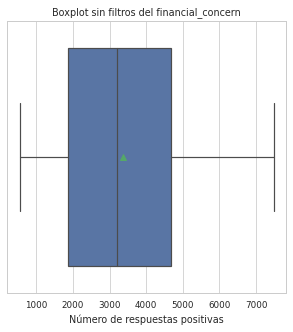

In [57]:
# Hacemos el Boxplot sin filtro

sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot sin filtros del financial_concern')
sns.boxplot(x=df_1_financial_corcern['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); # Podemos ver que no hay datos atipicos por lo que no es posible filtrar por IQR

###### **Accept_vaccine**

In [58]:
# Vamos a utilizar el df que ya habiamos filtrado, tomando de igual mananera el numero de respuestas positivas por día
df_2_accept_vaccine.head()

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-12,0.827023,9244,7645.000612
1,Aguascalientes,2020-12,0.820356,9623,7894.285788
2,Aguascalientes,2020-12,0.829659,9279,7698.405861
3,Aguascalientes,2020-12,0.845975,7633,6457.327175
4,Aguascalientes,2020-12,0.839036,7882,6613.281752


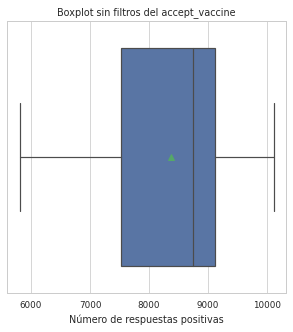

In [59]:
# Hacemos el Boxplot sin filtro

sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot sin filtros del accept_vaccine')
sns.boxplot(x=df_2_accept_vaccine['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); # Podemos ver que no hay datos atipicos por lo que no es posible filtrar por IQR

###### **Barrier_side_effects**

In [60]:
# Vamos a utilizar el df que ya habiamos filtrado, tomando de igual mananera el numero de respuestas positivas por día
df_3_barrier_side_effects.head()

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2021-2,0.573751,2551,1463.638801
1,Aguascalientes,2021-2,0.570975,2437,1391.466075
2,Aguascalientes,2021-2,0.555971,2560,1423.285760
3,Aguascalientes,2021-2,0.557596,2627,1464.804692
4,Aguascalientes,2021-2,0.600578,2656,1595.135168


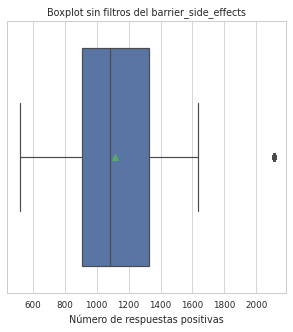

In [61]:
sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot sin filtros del barrier_side_effects')
sns.boxplot(x=df_3_barrier_side_effects['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); # Aqui si hay un solo dato atipico por lo que vamos a aplicar el filtro de IQR

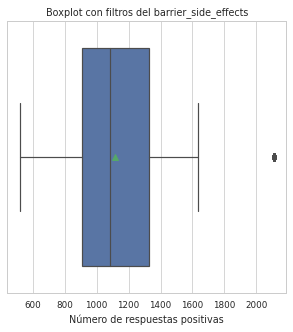

In [62]:
# Boxplot con filtro

iqr_03=df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.75)-df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.25)
filtro_superior_03=df_3_barrier_side_effects['amount_of_positive_answers']<df_3_barrier_side_effects['amount_of_positive_answers'].quantile(.25)-(iqr_03*1.5)
filtro_inferior_03=df_3_barrier_side_effects['amount_of_positive_answers']>df_3_barrier_side_effects['amount_of_positive_answers'].quantile(.25)-(iqr_03*1.5)
df_3_barrier_side_effects_filtrado=df_3_barrier_side_effects[filtro_inferior_03]

sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot con filtros del barrier_side_effects')
sns.boxplot(x=df_3_barrier_side_effects_filtrado['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); ## Al estar demaciado cerca el IQR no surte efecto, pero esto no afecta tanto ya que solo es un valor atipico.

###### **Trust_WHO_recommendation**

In [63]:
# Lo primero que vamos a hacer es filtrar el df2 para obtener el amount_of_positive_answers
df_2_trust_WHO_recommendation=df2_columnas_sin_indexar.iloc[:,[0,2,9,10]]
amount_of_positive_answers=df_2_trust_WHO_recommendation.sample_size*df_2_trust_WHO_recommendation.indicator_percentage 
df_2_trust_WHO_recommendation.insert(4,'amount_of_positive_answers',amount_of_positive_answers)
df_2_trust_WHO_recommendation.head(2) #Insertamos una tercera columna para poder hacer todo el analisis sobre la misma

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-12,0.768438,3152,2422.116576
1,Aguascalientes,2020-12,0.753498,8364,6302.257272


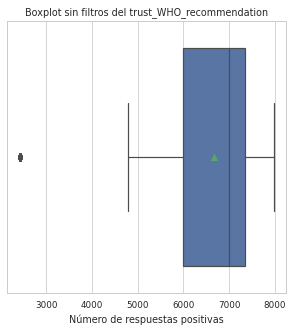

In [64]:
# Utiliando este nuevo filtro procedemos a hacer el Boxplot
sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot sin filtros del trust_WHO_recommendation')
sns.boxplot(x=df_2_trust_WHO_recommendation['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); # Aqui si hay un datos atipicos por lo que vamos a aplicar el filtro de IQR

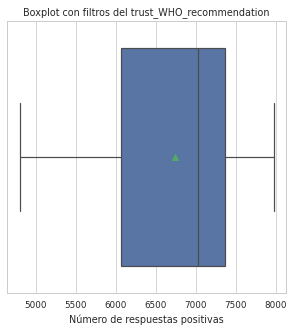

In [65]:
# Boxplot con filtro

iqr_04=df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(0.75)-df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(0.25)
filtro_superior_04=df_2_trust_WHO_recommendation['amount_of_positive_answers']<df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(.25)-(iqr_04*1.5)
filtro_inferior_04=df_2_trust_WHO_recommendation['amount_of_positive_answers']>df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(.25)-(iqr_04*1.5)
df_2_trust_WHO_recommendation_filtrado=df_2_trust_WHO_recommendation[filtro_inferior_04]

sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot con filtros del trust_WHO_recommendation')
sns.boxplot(x=df_2_trust_WHO_recommendation_filtrado['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); #Aqui sí fue posible quitar los datos atipicos.

###### **Trust_government_recommendation**

In [66]:
# Lo primero que vamos a hacer es filtrar el df2 para obtener el amount_of_positive_answers
df_2_trust_government_recommendation=df2_columnas_sin_indexar.iloc[:,[0,2,11,12]]
amount_of_positive_answers=df_2_trust_government_recommendation.sample_size*df_2_trust_government_recommendation.indicator_percentage 
df_2_trust_government_recommendation.insert(4,'amount_of_positive_answers',amount_of_positive_answers)
df_2_trust_government_recommendation.head(2) #Insertamos una tercera columna para poder hacer todo el analisis sobre la misma

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-12,0.657455,2942,1934.232610
1,Aguascalientes,2020-12,0.644496,7739,4987.754544


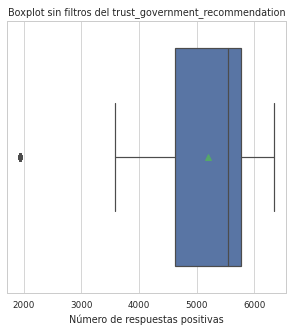

In [67]:
sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot sin filtros del trust_government_recommendation')
sns.boxplot(x=df_2_trust_government_recommendation['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); # Aqui si hay datos atipicos por lo que vamos a aplicar el filtro de IQR

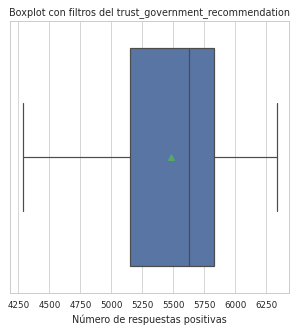

In [68]:
# Boxplot con filtro

iqr_05=df_2_trust_government_recommendation['amount_of_positive_answers'].quantile(0.75)-df_2_trust_government_recommendation['amount_of_positive_answers'].quantile(0.25)
filtro_superior_05=df_2_trust_government_recommendation['amount_of_positive_answers']<df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(.25)-(iqr_05*1.5)
filtro_inferior_05=df_2_trust_government_recommendation['amount_of_positive_answers']>df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(.25)-(iqr_05*1.5)
df_2_trust_government_recommendation_filtrado=df_2_trust_government_recommendation[filtro_inferior_05]

sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot con filtros del trust_government_recommendation')
sns.boxplot(x=df_2_trust_government_recommendation_filtrado['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); #Aqui sí fue posible quitar los datos atipicos.

###### **Conclusiones**

- Lo primero y más evidente es que las personas en nuestros país confian más en las recomendaciones de la OMS que en las de muestros propio gobierno.
- Lo siguiente es que hay una cantidad considerable de personas que estan en contra de la vacuna por sus efectos efectos efectos, por lo que se debe atacar ese rubro para conseguir que más personas se puedan vacunar.
- Algo positivo es que existen una gran aceptación de la vacuna.
- Por último tenemos que demanera extraña, una cantidad no tan grande de personas se encuentra preocupada por sus finanzas, tomando en cuenta que 2020 ha sido el peor añor año economicamente en toda la historio de México.

##### **2. Generación de tablas de frecuencia**

###### **Financial_concern**

In [69]:
# Lo primero que debemos obtener es el numero de filas que tiene
num_filas_df_1_financial_corcern=len(df_1_financial_corcern['amount_of_positive_answers'])

# Luego debemos sacar el k que es el numero de dividisiones que debe tener la tabla de frecuencias
# En estadistica la formula más aceptada para obtener esto es log_2(n)
# Donde es el numero de datos con los que se cuenta por obtenemos las filas

k_df_1_financial_corcern=math.ceil(math.log2(num_filas_df_1_financial_corcern))


# Ahora solo queda sustituirlo en función de pandas

amount_of_positive_answers=df_1_financial_corcern['amount_of_positive_answers']
segmento_df_1_financial_corcern=pd.cut(amount_of_positive_answers,k_df_1_financial_corcern)
amount_of_positive_answers.groupby(segmento_df_1_financial_corcern).count()

amount_of_positive_answers
(545.759, 1085.254]      137
(1085.254, 1617.826]    1133
(1617.826, 2150.398]     999
(2150.398, 2682.97]      676
(2682.97, 3215.542]      653
(3215.542, 3748.114]     712
(3748.114, 4280.686]     283
(4280.686, 4813.258]     852
(4813.258, 5345.829]     442
(5345.829, 5878.401]     667
(5878.401, 6410.973]     480
(6410.973, 6943.545]       0
(6943.545, 7476.117]      31
Name: amount_of_positive_answers, dtype: int64

###### **Accept_vaccine**

In [70]:
# Lo primero que debemos obtener es el numero de filas que tiene
num_filas_df_2_accept_vaccine=len(df_2_accept_vaccine['amount_of_positive_answers'])

# Luego debemos sacar el k que es el numero de dividisiones que debe tener la tabla de frecuencias
# En estadistica la formula más aceptada para obtener esto es log_2(n)
# Donde es el numero de datos con los que se cuenta por obtenemos las filas

k_df_2_accept_vaccine=math.ceil(math.log2(num_filas_df_2_accept_vaccine))


# Ahora solo queda sustituirlo en función de pandas
amount_of_positive_answers_02=df_2_accept_vaccine['amount_of_positive_answers']
segmento_df_2_accept_vaccine=pd.cut(amount_of_positive_answers_02,k_df_2_accept_vaccine)
amount_of_positive_answers_02.groupby(segmento_df_2_accept_vaccine).count()

amount_of_positive_answers
(5808.255, 6203.103]      26
(6203.103, 6593.655]      26
(6593.655, 6984.207]      79
(6984.207, 7374.759]     215
(7374.759, 7765.312]     169
(7765.312, 8155.864]      58
(8155.864, 8546.416]     144
(8546.416, 8936.968]     323
(8936.968, 9327.52]      299
(9327.52, 9718.072]      211
(9718.072, 10108.625]     31
Name: amount_of_positive_answers, dtype: int64

###### **Barrier_side_effects**

In [71]:
# Lo primero que debemos obtener es el numero de filas que tiene
num_filas_df_3_barrier_side_effects=len(df_3_barrier_side_effects['amount_of_positive_answers'])

# Luego debemos sacar el k que es el numero de dividisiones que debe tener la tabla de frecuencias
# En estadistica la formula más aceptada para obtener esto es log_2(n)
# Donde es el numero de datos con los que se cuenta por obtenemos las filas

k_df_3_barrier_side_effects=math.ceil(math.log2(num_filas_df_3_barrier_side_effects))


# Ahora solo queda sustituirlo en función de pandas
amount_of_positive_answers_03=df_3_barrier_side_effects['amount_of_positive_answers']
segmento_df_3_barrier_side_effects=pd.cut(amount_of_positive_answers_03,k_df_3_barrier_side_effects)
amount_of_positive_answers_03.groupby(segmento_df_3_barrier_side_effects).count()

amount_of_positive_answers
(518.416, 664.282]       82
(664.282, 808.561]      132
(808.561, 952.84]       346
(952.84, 1097.119]      435
(1097.119, 1241.398]    301
(1241.398, 1385.677]    207
(1385.677, 1529.956]    266
(1529.956, 1674.235]     80
(1674.235, 1818.514]      0
(1818.514, 1962.793]      0
(1962.793, 2107.072]     31
Name: amount_of_positive_answers, dtype: int64

###### **Trust_WHO_recommendation**

In [72]:
# Lo primero que debemos obtener es el numero de filas que tiene
num_filas_df_2_trust_WHO_recommendation_filtrado=len(df_2_trust_WHO_recommendation_filtrado['amount_of_positive_answers'])

# Luego debemos sacar el k que es el numero de dividisiones que debe tener la tabla de frecuencias
# En estadistica la formula más aceptada para obtener esto es log_2(n)
# Donde es el numero de datos con los que se cuenta por obtenemos las filas

k_df_2_trust_WHO_recommendation_filtrado=math.ceil(math.log2(num_filas_df_2_trust_WHO_recommendation_filtrado))


# Ahora solo queda sustituirlo en función de pandas
amount_of_positive_answers_04=df_2_trust_WHO_recommendation_filtrado['amount_of_positive_answers']
segmento_df_2_trust_WHO_recommendation_filtrado=pd.cut(amount_of_positive_answers_04,k_df_2_trust_WHO_recommendation_filtrado)
amount_of_positive_answers_04.groupby(segmento_df_2_trust_WHO_recommendation_filtrado).count()

# Es importante mencionar que aqui los filtros fueron efectivos por lo que trabajamos con datos filtrados

amount_of_positive_answers
(4795.136, 5087.053]     26
(5087.053, 5375.794]     53
(5375.794, 5664.534]    161
(5664.534, 5953.275]    106
(5953.275, 6242.016]     83
(6242.016, 6530.756]    115
(6530.756, 6819.497]    174
(6819.497, 7108.238]    174
(7108.238, 7396.979]    299
(7396.979, 7685.719]    239
(7685.719, 7974.46]     122
Name: amount_of_positive_answers, dtype: int64

###### **Trust_government_recommendation**

In [73]:
# Lo primero que debemos obtener es el numero de filas que tiene
num_filas_df_2_trust_government_recommendation_filtrado=len(df_2_trust_government_recommendation_filtrado['amount_of_positive_answers'])

# Luego debemos sacar el k que es el numero de dividisiones que debe tener la tabla de frecuencias
# En estadistica la formula más aceptada para obtener esto es log_2(n)
# Donde es el numero de datos con los que se cuenta por obtenemos las filas

k_df_2_trust_government_recommendation_filtrado=math.ceil(math.log2(num_filas_df_2_trust_government_recommendation_filtrado))


# Ahora solo queda sustituirlo en función de pandas
amount_of_positive_answers_05=df_2_trust_government_recommendation_filtrado['amount_of_positive_answers']
segmento_df_2_trust_government_recommendation_filtrado=pd.cut(amount_of_positive_answers_05,k_df_2_trust_government_recommendation_filtrado)
amount_of_positive_answers_05.groupby(segmento_df_2_trust_government_recommendation_filtrado).count()

amount_of_positive_answers
(4285.709, 4473.69]      54
(4473.69, 4659.626]      80
(4659.626, 4845.562]     83
(4845.562, 5031.497]     88
(5031.497, 5217.433]     58
(5217.433, 5403.368]     57
(5403.368, 5589.304]    177
(5589.304, 5775.24]     354
(5775.24, 5961.175]     151
(5961.175, 6147.111]    180
(6147.111, 6333.046]     30
Name: amount_of_positive_answers, dtype: int64

##### **3. Generación de histogramas**

###### **Trust_WHO_recommendation**

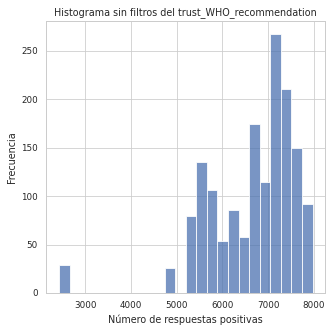

In [74]:
plt.figure(figsize=(5,5))
plt.title('Histograma sin filtros del trust_WHO_recommendation')
sns.histplot(data=df_2_trust_WHO_recommendation, x='amount_of_positive_answers');
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Frecuencia'); # Es evidente ver los datos atipicos, por lo que vamos a hacer otro sin los mismos.

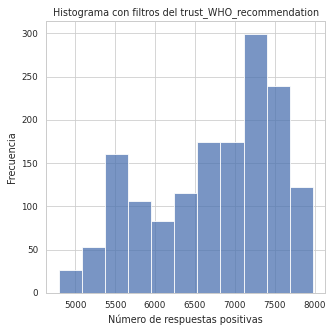

In [75]:
plt.figure(figsize=(5,5))
plt.title('Histograma con filtros del trust_WHO_recommendation')
sns.histplot(data=df_2_trust_WHO_recommendation_filtrado, x='amount_of_positive_answers', bins=11);
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Frecuencia'); #Aqui podemos ver mejor el histograma

###### **Trust_government_recommendation**

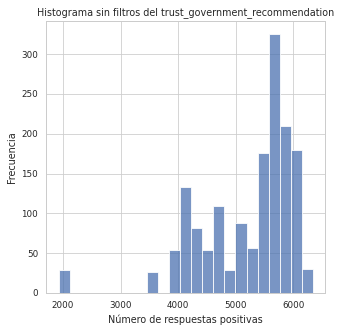

In [76]:
plt.figure(figsize=(5,5))
plt.title('Histograma sin filtros del trust_government_recommendation')
sns.histplot(data=df_2_trust_government_recommendation, x='amount_of_positive_answers');
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Frecuencia'); # Es evidente ver los datos atipicos, por lo que vamos a hacer otro sin los mismos.

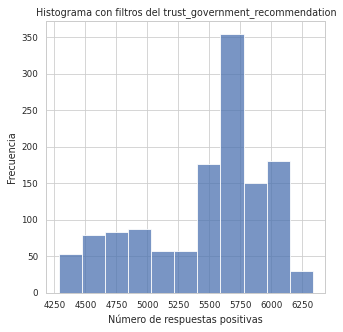

In [77]:
plt.figure(figsize=(5,5))
plt.title('Histograma con filtros del trust_government_recommendation')
sns.histplot(data=df_2_trust_government_recommendation_filtrado, x='amount_of_positive_answers', bins=11);
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Frecuencia'); #Aqui podemos ver mejor el histograma

##### **4. Generación de gráficas de densidad**

###### **Financial_concern**

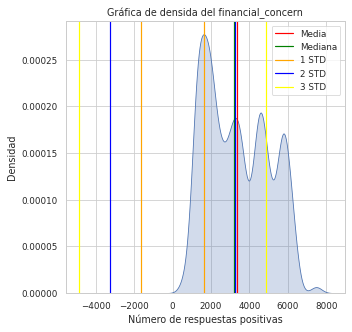

In [78]:
# Configuramos la gráfica de densidad
plt.figure(figsize=(5,5))
plt.title('Gráfica de densida del financial_concern')
sns.kdeplot(x=df_1_financial_corcern['amount_of_positive_answers'],fill=True);
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Densidad');
plt.axvline(x=media, color='red', label='Media');
plt.axvline(x=mediana, color='green', label='Mediana');
plt.axvline(x=std, color = 'orange', label='1 STD');
plt.axvline(x=-std, color = 'orange')
plt.axvline(x=2*std, color = 'blue', label='2 STD');
plt.axvline(x=-2*std, color = 'blue')
plt.axvline(x=3*std, color = 'yellow', label='3 STD');
plt.axvline(x=-3*std, color = 'yellow')
plt.legend(); 

In [79]:
# Le agregamos el skew y la kurtosis
print(f"Kurtosis: {kurtosis(df_1_financial_corcern['amount_of_positive_answers'])}")
print(f"Asimetria: {skew(df_1_financial_corcern['amount_of_positive_answers'])}")

Kurtosis: -1.1521311071662361
Asimetria: 0.2766236511461239


###### **Accept_vaccine**

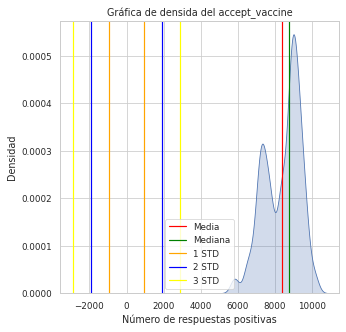

In [80]:
# Configuramos la gráfica de densidad
plt.figure(figsize=(5,5))
plt.title('Gráfica de densida del accept_vaccine')
sns.kdeplot(x=df_2_accept_vaccine['amount_of_positive_answers'],fill=True);
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Densidad');
plt.axvline(x=media_02, color='red', label='Media');
plt.axvline(x=mediana_02, color='green', label='Mediana');
plt.axvline(x=std_02, color = 'orange', label='1 STD');
plt.axvline(x=-std_02, color = 'orange')
plt.axvline(x=2*std_02, color = 'blue', label='2 STD');
plt.axvline(x=-2*std_02, color = 'blue')
plt.axvline(x=3*std_02, color = 'yellow', label='3 STD');
plt.axvline(x=-3*std_02, color = 'yellow')
plt.legend(); 

In [81]:
print(f"Kurtosis: {kurtosis(df_2_accept_vaccine['amount_of_positive_answers'])}")
print(f"Asimetria: {skew(df_2_accept_vaccine['amount_of_positive_answers'])}")

Kurtosis: -0.6300303130389606
Asimetria: -0.5008690511068308


###### **Barrier_side_effects**

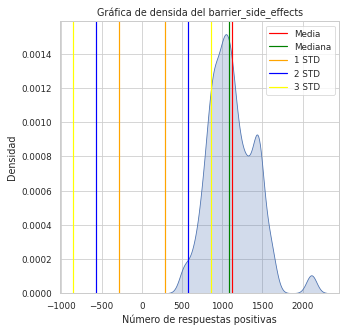

In [82]:
# Configuramos la gráfica de densidad
plt.figure(figsize=(5,5))
plt.title('Gráfica de densida del barrier_side_effects')
sns.kdeplot(x=df_3_barrier_side_effects['amount_of_positive_answers'],fill=True);
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Densidad');
plt.axvline(x=media_03, color='red', label='Media');
plt.axvline(x=mediana_03, color='green', label='Mediana');
plt.axvline(x=std_03, color = 'orange', label='1 STD');
plt.axvline(x=-std_03, color = 'orange')
plt.axvline(x=2*std_03, color = 'blue', label='2 STD');
plt.axvline(x=-2*std_03, color = 'blue')
plt.axvline(x=3*std_03, color = 'yellow', label='3 STD');
plt.axvline(x=-3*std_03, color = 'yellow')
plt.legend(); 

In [83]:
print(f"Kurtosis: {kurtosis(df_3_barrier_side_effects['amount_of_positive_answers'])}")
print(f"Asimetria: {skew(df_3_barrier_side_effects['amount_of_positive_answers'])}")

Kurtosis: 0.9295041043783878
Asimetria: 0.6192526454122463


#### _**Sesión 3:** Exploración de variables categóricas y análisis multivariable_

1. **Convierte la variable numérica `covid_19 (df1)` en una variable categórica de 4 categorías, donde los valores de 0 a 0.0125 pasen a ser la categoría `Low`, los de 0.0125 a 0.025 la categoría `Normal`, los de 0.025 a 0.0375 la categoría `High` y los de 0.0375 en adelante la categoría `Very high`. Nombra la nueva columna como `contagion_rate` y elimina la columna llamada `covid_19`. Sin embargo, ten en cuenta que debes guardar los cambios en una variable distinta para conservar el _dataframe_ original.**

2. **Nota que nuestras variables categórica son: `covid_19 (df1)`, `survey_date_short (df1)` y `region_where_applied (df1)`.**

3. **Genera gráficas de barras con las variables categóricas `covid_19 (df1)`, `survey_date_short (df1)` y `region_where_applied (df1)`. Personaliza el estilo de las gráficas y nombra apropiadamente los títulos y los ejes.**

4. **Genera una tabla de contingencia que incluya las tres variables categóricas antes mencionadas; las columnas deben ser las fechas cortas, mientras que los índices serán los nombres de los estados y las categorías de la variable `covid_19 (df1)` (nota que es una sola tabla con multi-índices en las filas, donde el índice principal es el nombre de cada estado).**

5. **Genera `Boxplots` y `Violinplots` combinando la variable numérica `accept_vaccine (df2)` con la variable categórica `region_where_applied (df2)`. Para evitar tener muchos gráficos en un solo plano cartesiano, considera incluir, a lo sumo, cuatro `plots` por plano. Nota que son 32 estados; puedes hacer 16 `Boxplots` y 16 `Violinplopts`.**

##### **1. Creación de la variable categorica covid_19**

In [84]:
# Lo primero que debemos hacer es un filtro con las variables que vamos a utilizar

df_1_covid_19=df1_columnas_sin_indexar.iloc[:,[0,2,3,4]]
amount_of_positive_answers=df_1_covid_19.sample_size*df_1_covid_19.indicator_percentage 
df_1_covid_19.insert(4,'amount_of_positive_answers',amount_of_positive_answers)
df_1_covid_19.head(2)

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-11,0.023153,8453,195.712309
1,Aguascalientes,2020-11,0.020100,9490,190.749000


In [107]:
# Creamos los valores para el filtro para convetir a covid_19 en una variable categorica

valores=[0,0.0125,0.025,0.375,math.inf]
categorias=['Low','Normal','High','Very high']
contagion_rate=pd.cut(x=df_1_covid_19['indicator_percentage'],bins=valores,labels=categorias)
df_1_covid_19_02=df_1_covid_19.copy()
df_1_covid_19_02.insert(4,'contagion_rate',contagion_rate)

In [108]:
df_1_covid_19_02.head(2)

,region_where_applied,survey_date_short,indicator_percentage,sample_size,contagion_rate,amount_of_positive_answers
0,Aguascalientes,2020-11,0.023153,8453,Normal,195.712309
1,Aguascalientes,2020-11,0.020100,9490,Normal,190.749000


In [113]:
# Por último eliminamos la columna de indicator_percentage que es de covid_19
df_1_covid_19_categorico=df_1_covid_19_02.copy()
del(df_1_covid_19_categorico['indicator_percentage'])
df_1_covid_19_categorico.head(10) #Así quedo lista la variable categorica

,region_where_applied,survey_date_short,sample_size,contagion_rate,amount_of_positive_answers
0,Aguascalientes,2020-11,8453,Normal,195.712309
1,Aguascalientes,2020-11,9490,Normal,190.749000
2,Aguascalientes,2020-11,9540,High,238.977000
3,Aguascalientes,2020-11,9315,High,241.780140
4,Aguascalientes,2020-11,9430,Normal,209.874080
5,Aguascalientes,2020-11,9408,Normal,203.692608
6,Aguascalientes,2020-11,9584,Normal,220.547008
7,Aguascalientes,2020-11,9851,Normal,220.297913
8,Aguascalientes,2020-12,9948,Normal,237.816888
9,Aguascalientes,2020-12,9954,Normal,248.730552


##### **2. Creación de las variables categoricas region_where_applied y survey_date_short**

###### **Region_where_applied**

In [88]:
#Solo debemos aplicar la función astype
df_1_covid_19_categorico['region_where_applied'].astype('category')

0       Aguascalientes
1       Aguascalientes
2       Aguascalientes
3       Aguascalientes
4       Aguascalientes
             ...      
7060         Zacatecas
7061         Zacatecas
7062         Zacatecas
7063         Zacatecas
7064         Zacatecas
Name: region_where_applied, Length: 7065, dtype: category
Categories (32, object): ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', ...,
                          'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas']

###### **Survey_date_short**

In [89]:
#Solo debemos aplicar la función astype
df_1_covid_19_categorico['survey_date_short'].astype('category')

0       2020-11
1       2020-11
2       2020-11
3       2020-11
4       2020-11
         ...   
7060     2021-2
7061     2021-5
7062     2021-8
7063     2021-8
7064     2021-8
Name: survey_date_short, Length: 7065, dtype: category
Categories (11, object): ['2020-11', '2020-12', '2021-1', '2021-2', ..., '2021-6', '2021-7', '2021-8',
                          '2021-9']

##### **3. Creación de las gráficas de barra**

###### **Covid_19**

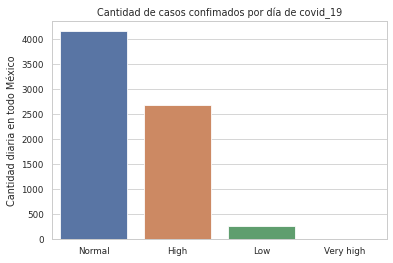

In [90]:
# Primero hacemos el conteo de cada actegoria
counts_covid_19=df_1_covid_19_categorico['contagio_rate'].value_counts()

# Luego configuramos la gráfica de barra
ax= sns.barplot(x=counts_covid_19.index,y=counts_covid_19, order=counts_covid_19.index)
ax.set_title('Cantidad de casos confimados por día de covid_19')
ax.set(ylabel='Cantidad diaria en todo México');

###### **Region_where_applied**

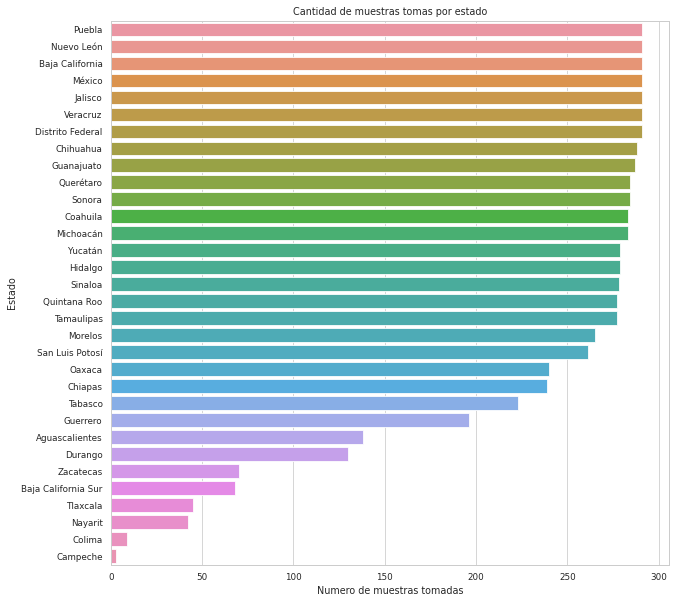

In [91]:
# Primero hacemos el conteo de cada actegoria
counts_region_where_applied=df_1_covid_19_categorico['region_where_applied'].value_counts()

# Luego configuramos la gráfica de barra
plt.figure(figsize=(10,10))
ax= sns.barplot(y=counts_region_where_applied.index,x=counts_region_where_applied, order=counts_region_where_applied.index)
ax.set_title('Cantidad de muestras tomas por estado');
ax.set(ylabel='Estado', xlabel='Numero de muestras tomadas');

###### **Survey_date_short**

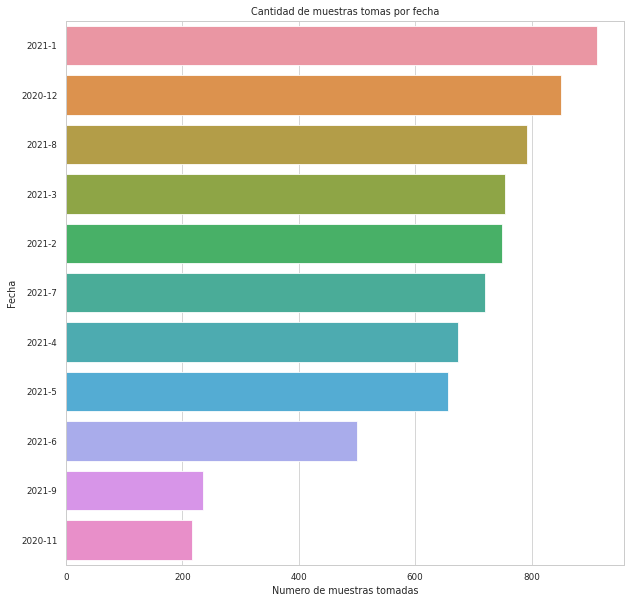

In [92]:
# Primero hacemos el conteo de cada actegoria
counts_survey_date_short=df_1_covid_19_categorico['survey_date_short'].value_counts()

# Luego configuramos la gráfica de barra
plt.figure(figsize=(10,10))
ax= sns.barplot(y=counts_survey_date_short.index,x=counts_survey_date_short, order=counts_survey_date_short.index)
ax.set_title('Cantidad de muestras tomas por fecha');
ax.set(ylabel='Fecha', xlabel='Numero de muestras tomadas');

##### **4. Creación de la tabla de contingencia**

In [116]:
# Lo que debemos hacer es una tabla de contingencia multivariable que podemos hacer con crosstab
# Vamos a sustituir los NaN con ceros


crosstab=pd.crosstab(df_1_covid_19_categorico['region_where_applied'], [df_1_covid_19_categorico['contagion_rate'],df_1_covid_19_categorico['survey_date_short']])
crosstab.stack(0)

survey_date_short                    2020-11  2020-12  ...  2021-8  2021-9
region_where_applied contagion_rate                    ...                
Aguascalientes       Low                 NaN      NaN  ...     NaN     NaN
                     Normal              6.0     24.0  ...     NaN     NaN
                     High                2.0      7.0  ...    14.0     0.0
Baja California      Low                 NaN      NaN  ...     NaN     NaN
                     Normal              6.0     24.0  ...     NaN     NaN
...                                      ...      ...  ...     ...     ...
Yucatán              Normal              6.0     22.0  ...     NaN     NaN
                     High                2.0      7.0  ...    30.0    10.0
Zacatecas            Low                 NaN      NaN  ...     NaN     NaN
                     Normal              6.0     22.0  ...     NaN     NaN
                     High                2.0      6.0  ...     3.0     0.0

[96 rows x 11 columns]

##### **5. Generación de Boxplots y Violinplots**

###### **Boxplot**

In [94]:
# Lo primero que vamos a hacer es convertir la variable region_where_applied del df_2_accept_vaccine

df_2_accept_vaccine['region_where_applied'].astype('category')

0       Aguascalientes
1       Aguascalientes
2       Aguascalientes
3       Aguascalientes
4       Aguascalientes
             ...      
1576         Zacatecas
1577         Zacatecas
1578         Zacatecas
1579         Zacatecas
1580         Zacatecas
Name: region_where_applied, Length: 1581, dtype: category
Categories (32, object): ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', ...,
                          'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas']

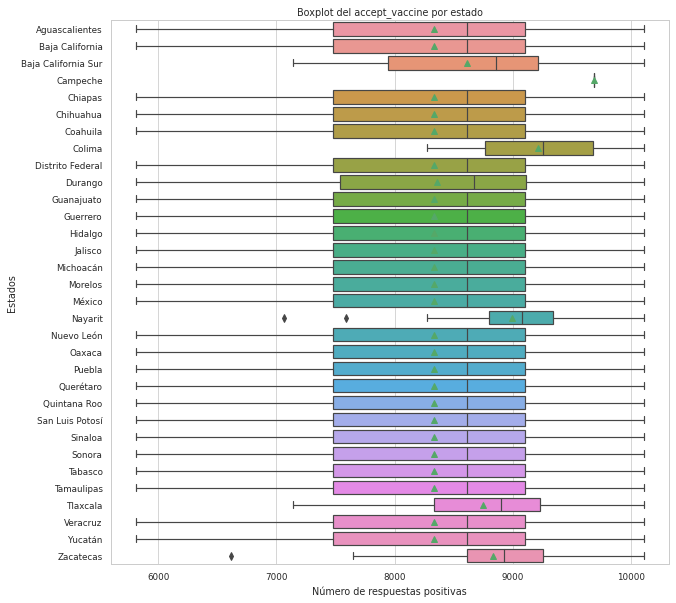

In [95]:
# Creamos el Boxplot

sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(10,10))
plt.title('Boxplot del accept_vaccine por estado')
sns.boxplot(x=df_2_accept_vaccine['amount_of_positive_answers'],y=df_2_accept_vaccine['region_where_applied'],showmeans=True);
plt.xlabel('Número de respuestas positivas');
plt.ylabel('Estados'); #Algo importante a resaltar aqui es que de ,manera general no parece haber datos atipicos pero de manera particular sí podemos verlos


<Figure size 2160x2160 with 0 Axes>

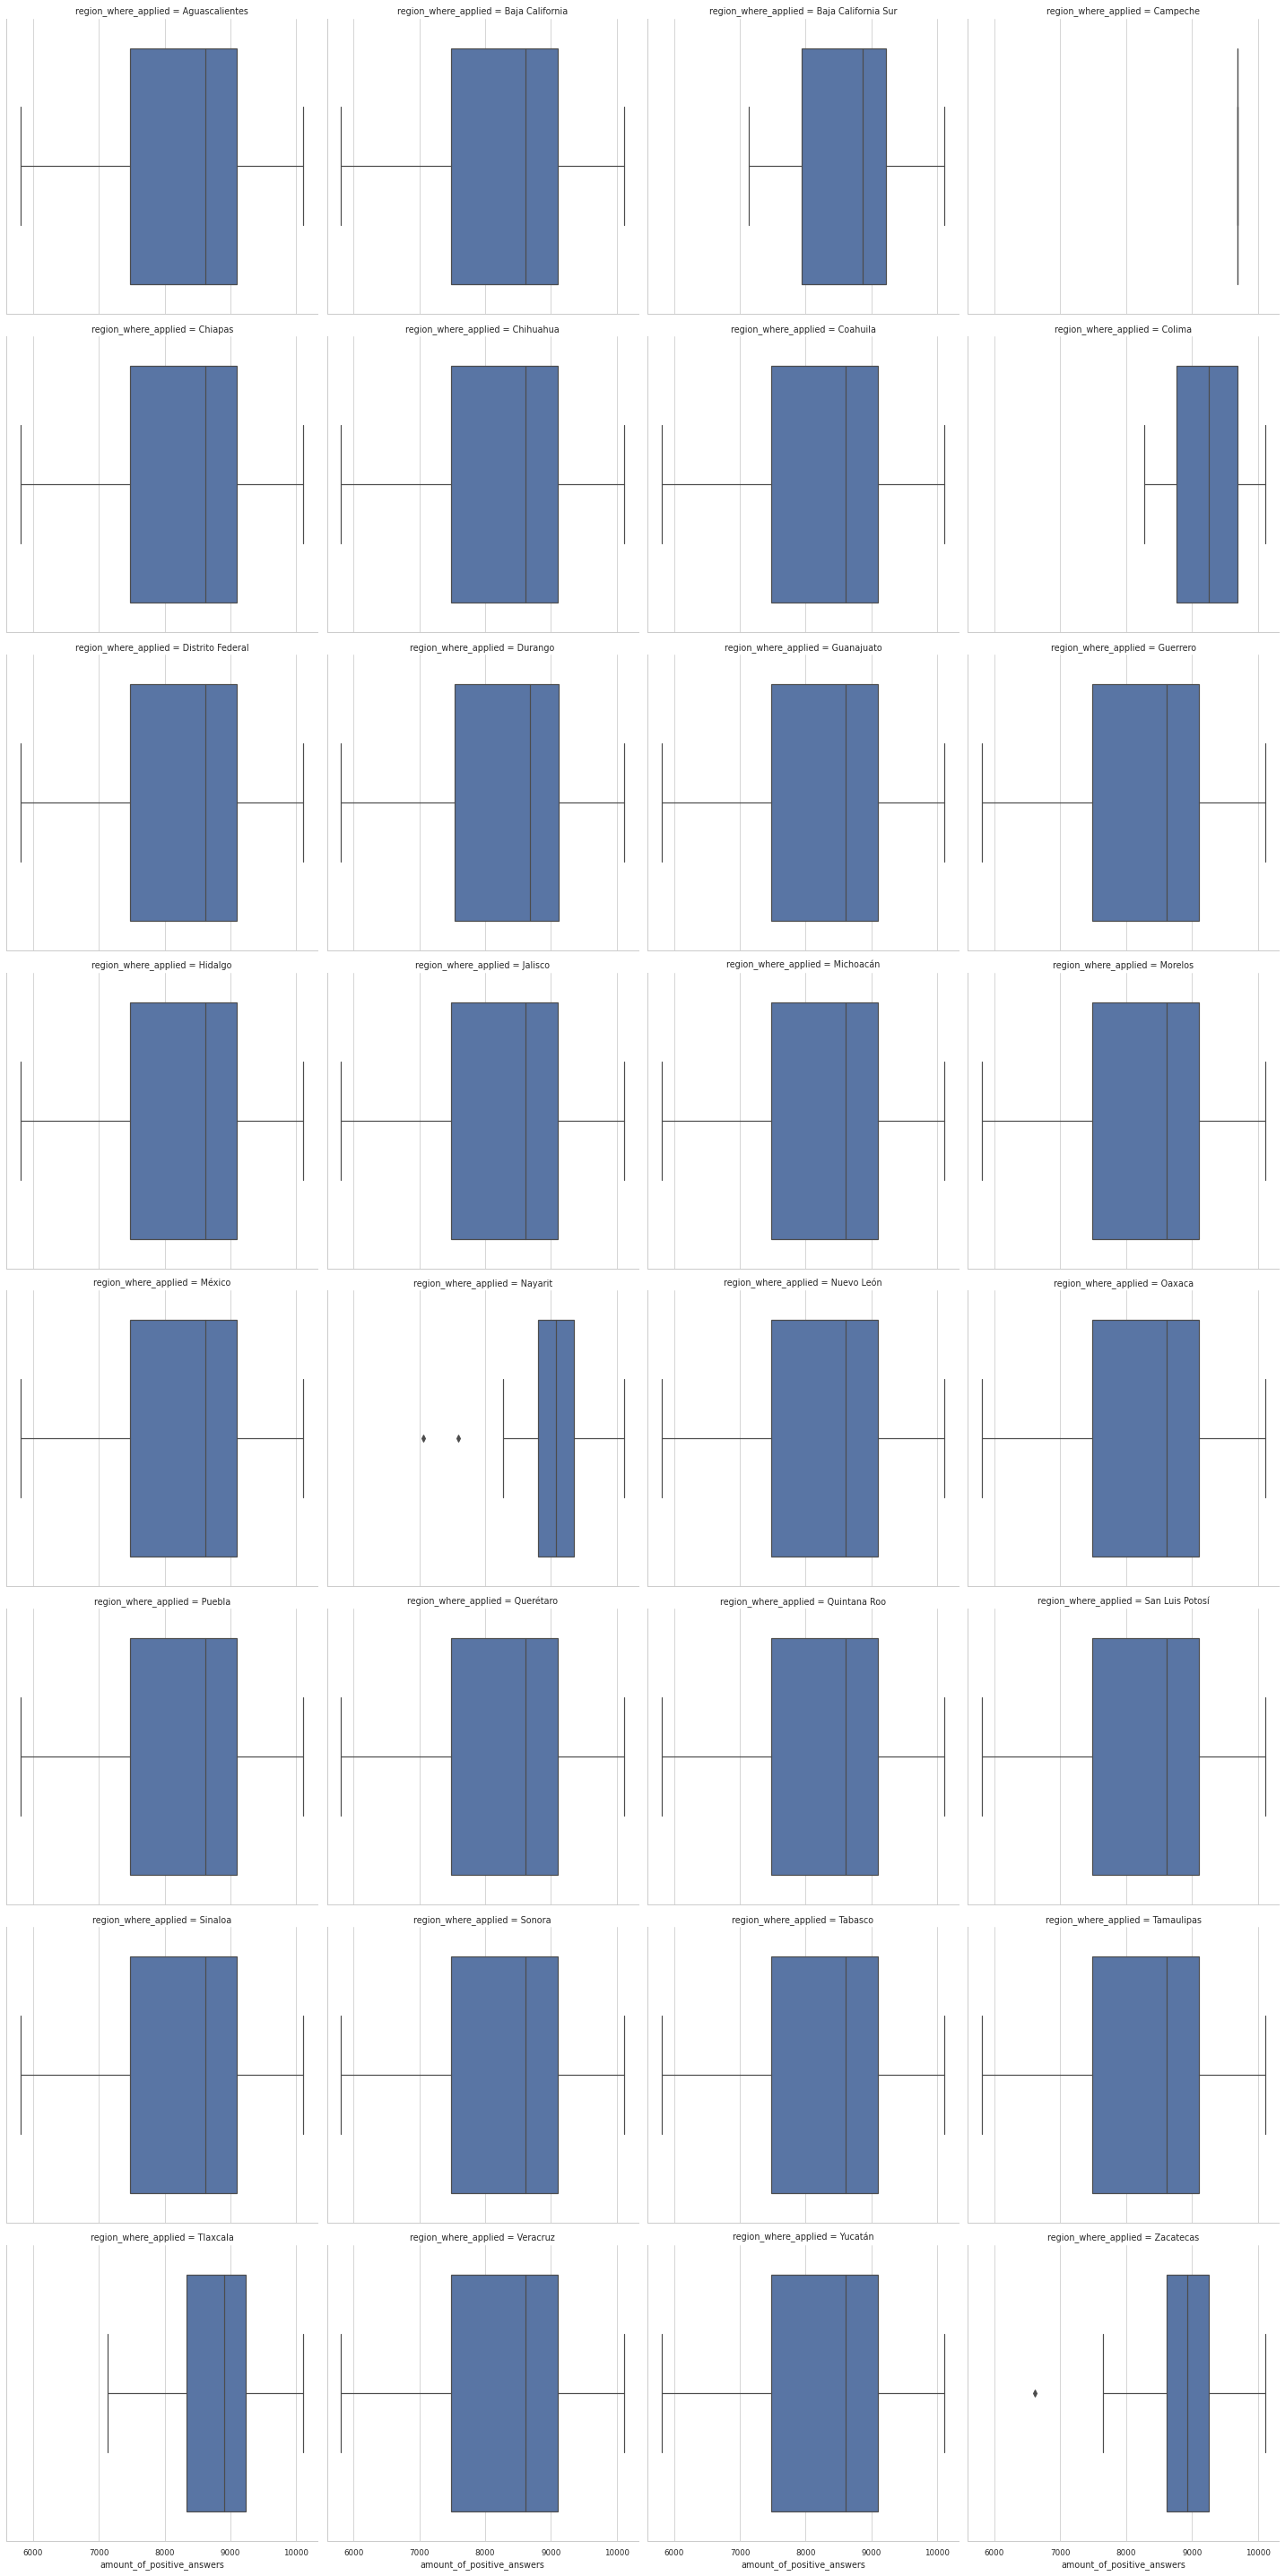

In [142]:
# Podemos hacerlos separados

plt.figure(figsize=(30,30));
sns.catplot(col='region_where_applied',
            x='amount_of_positive_answers',
            col_wrap=4, 
            kind='box',
            data=df_2_accept_vaccine[df_2_accept_vaccine.region_where_applied.notnull()],);

###### **Violinplots**

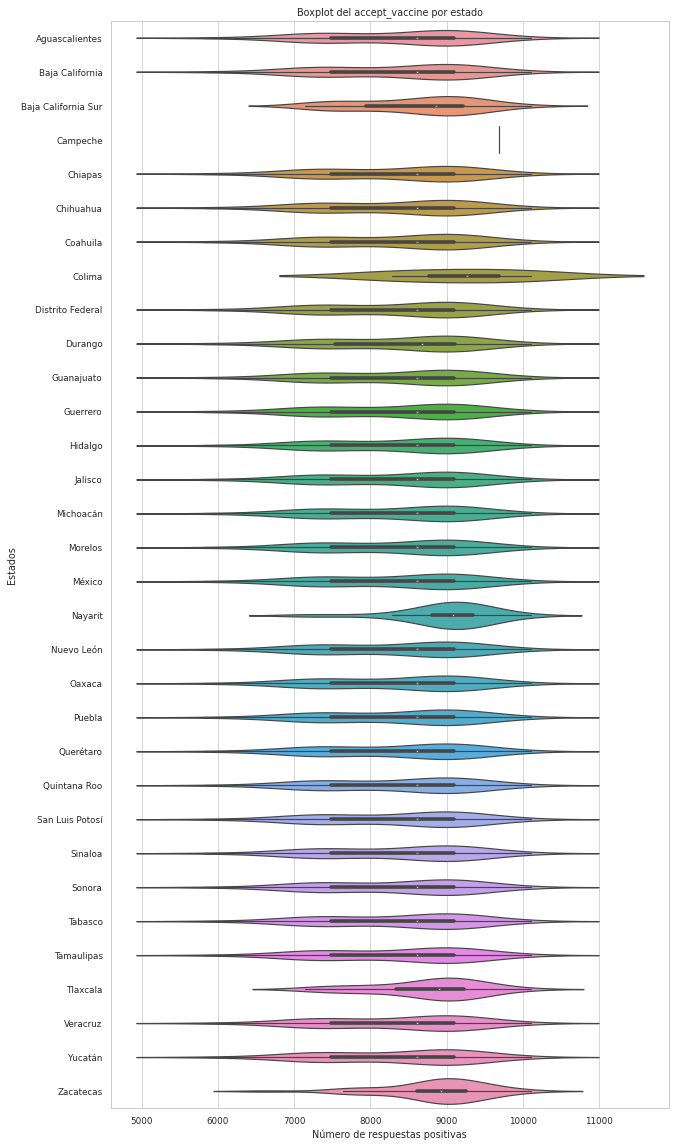

In [145]:
sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(10,20))
plt.title('Violinplot del accept_vaccine por estado')
sns.violinplot(x=df_2_accept_vaccine['amount_of_positive_answers'],y=df_2_accept_vaccine['region_where_applied'],showmeans=True);
plt.xlabel('Número de respuestas positivas');
plt.ylabel('Estados');

<Figure size 2160x2160 with 0 Axes>

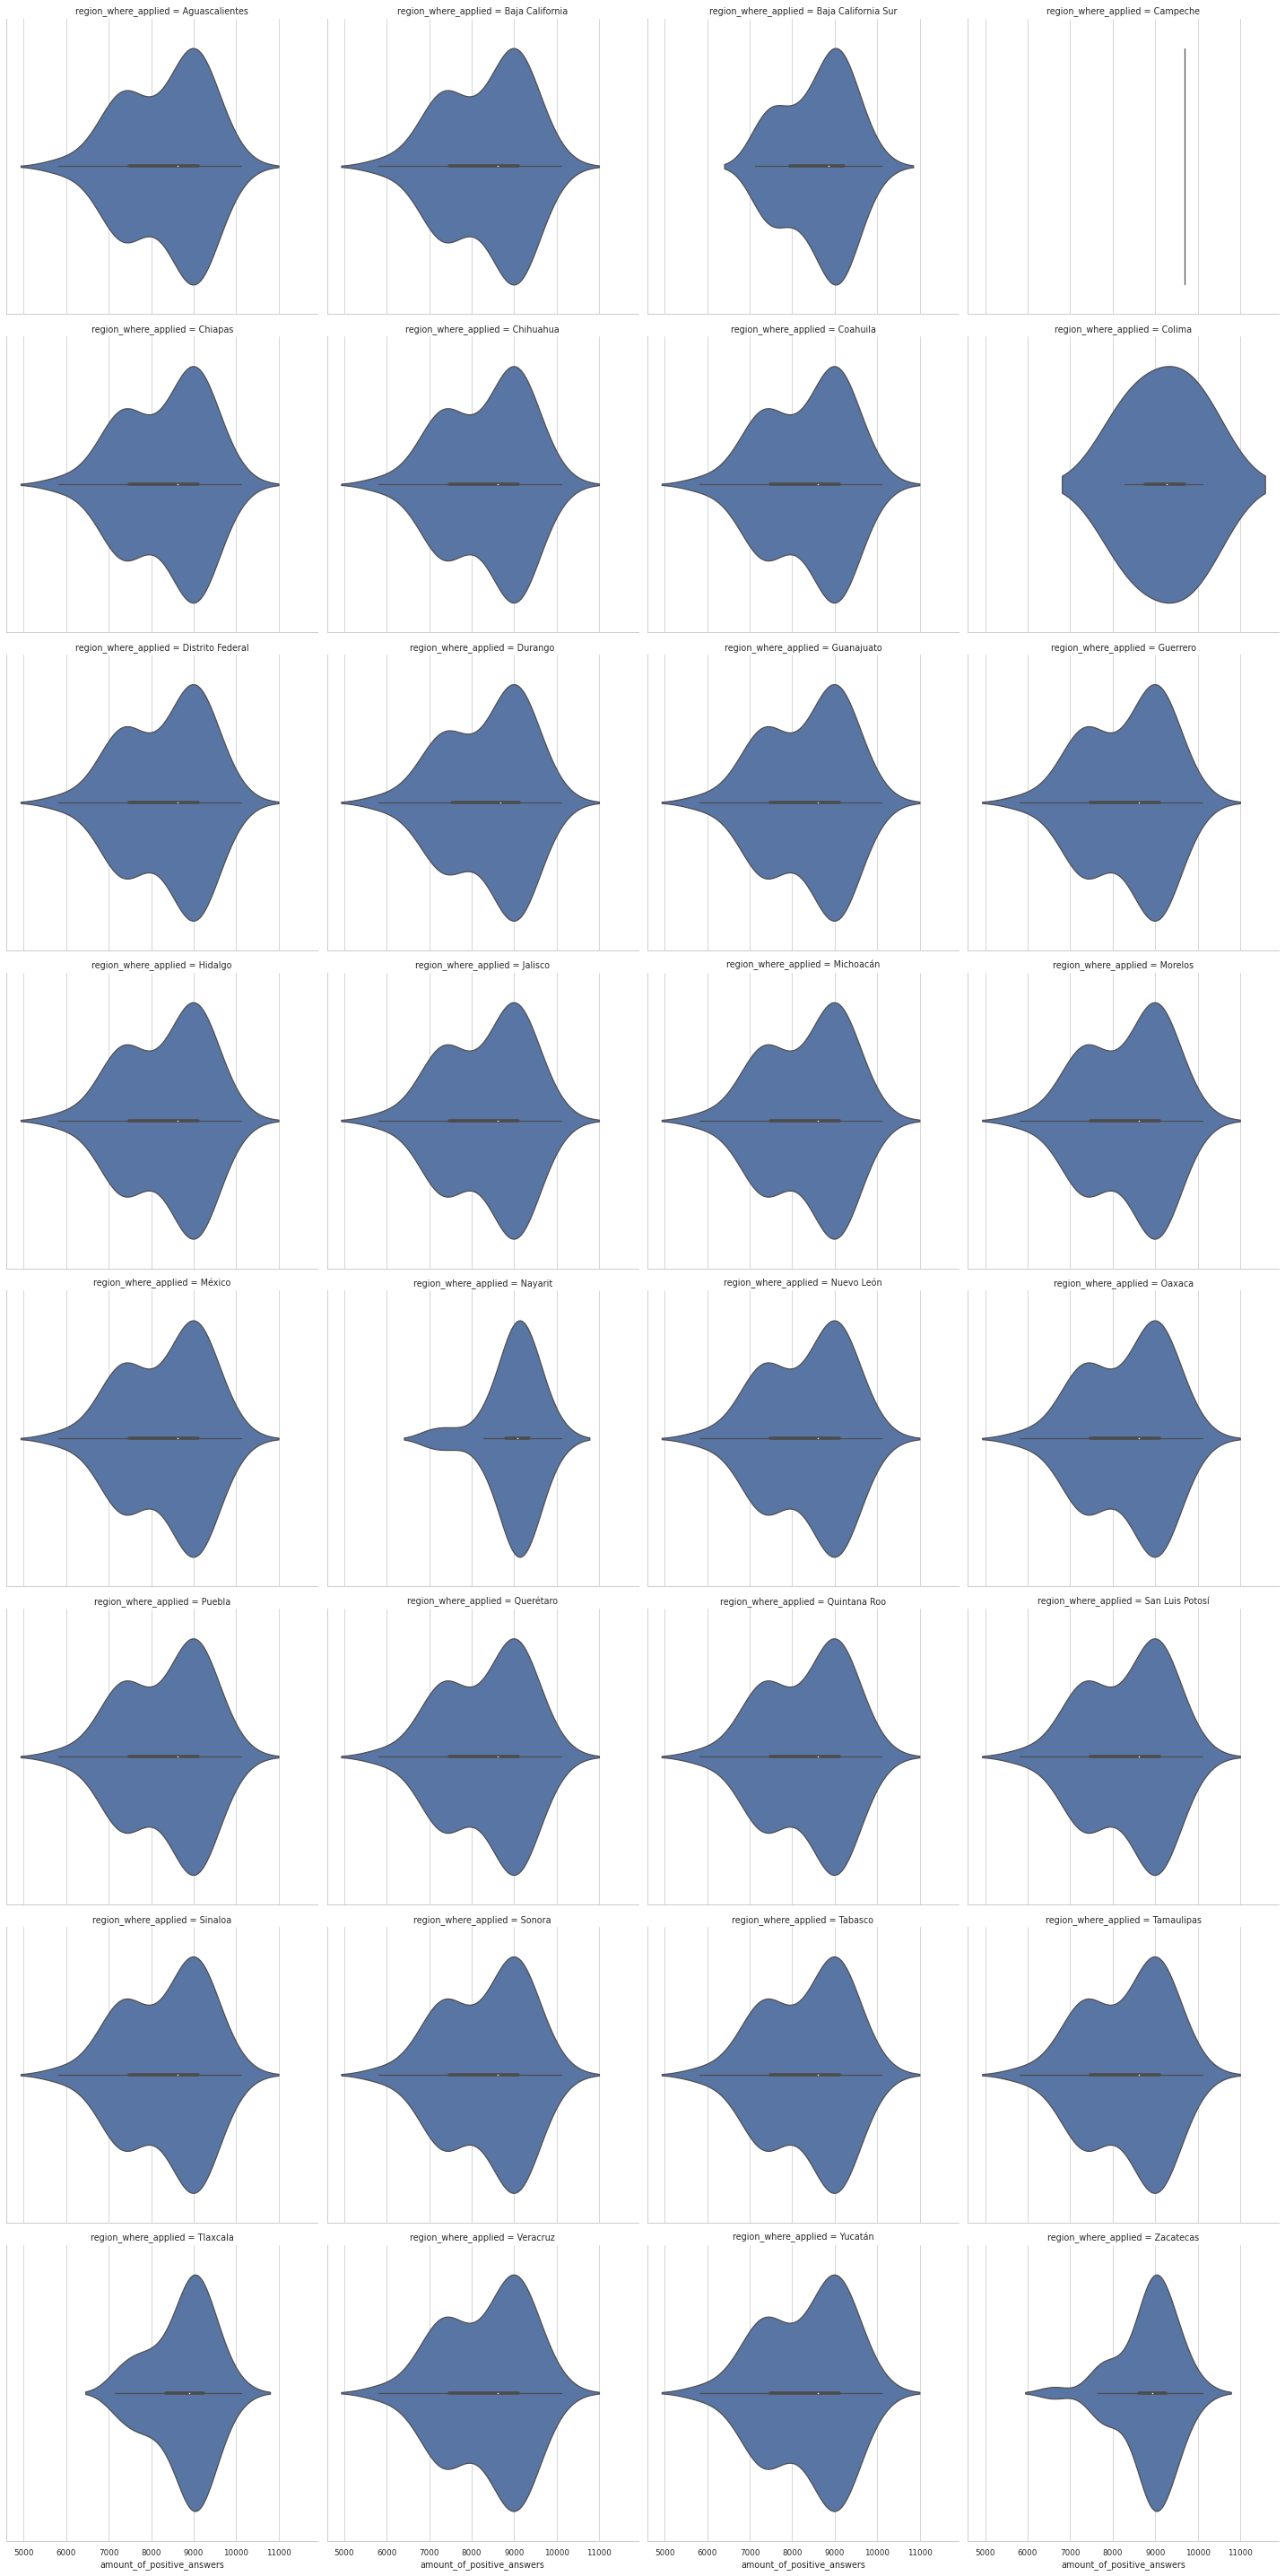

In [146]:
plt.figure(figsize=(30,30));
sns.catplot(col='region_where_applied',
            x='amount_of_positive_answers',
            col_wrap=4, 
            kind='violin',
            data=df_2_accept_vaccine[df_2_accept_vaccine.region_where_applied.notnull()],);

#### _**Sesión 4:** Correlaciones y Regresión linear simple_

1. **Genera una tabla de correlaciones utilizando la función `croostab`. Hazlo con cada uno de los _dataframes_ globales que ya conoces.**
2. **Genera mapas de calor para cada una de las tablas anteriores. Personaliza el estilo y asígnales nombres apropiados.**
**Recuerda que en este punto del desarrollo, los _dataframes_ ya tienen que estar perfectamente limpios y los nombres de las columnas deben ser los adecuados.**
3. **Genera un `Pairplot` del tercer _dataframe_ dejando fuera las variables `partially_vaccinated` y `fully_vaccinated`.**
4. **Repite el primer punto de la Sesión 2, pero utilizando `scatterplots` en vez de `boxplots`. Haz una comparación y anota tus observaciones.**
5. **Aplica un modelo de regresión lineal simple para las variables `covid_19` (nota que este indicador está en el _dataframe_ que no contiene a la variable catergórica `contagion_rate` ni a las columnas `sample_size`) y `wear_a_mask`.**
6. **Aplica un modelo de regresión lineal multivariable con las variables `trust_healthcare_recommendation`, `trust_government_recommendation`, `trust_family_recommendation` y `accept_vaccine` (siendo esta última la variable independiente).**

#### _**Sesión 5:** Distribuciones muestrales y Técnicas de evaluación de modelos_

#### _**Sesión 6:** Visualización de datos avanzada_

#### _**Sesión 7:** Pruebas A/B y Procesamiento de lenguaje natural_

#### _**Sesión 8:** Introducción a Machine Learning: clasificación no supervisada y supervisada_